In [5]:
import sys
sys.path.append('/home/mowp/workspace/mowp_scripts/tools')


import os
os.environ['R_HOME'] = '/home/mowp/mambaforge/envs/sc/lib/R'

%load_ext autoreload
%autoreload 1
%aimport sctk

In [1]:
import pandas as pd
import numpy as np
from anndata import AnnData

In [2]:
# import importlib

# importlib.reload(sctk.tools.aucell)

In [6]:
mtx = '/home/mowp/test/data/GSE60361_C1-3005-Expression.txt.gz'
mtx = pd.read_csv(mtx, sep='\t', index_col=0).T

In [43]:
adata = AnnData(
    mtx,
    obs=pd.DataFrame(index=mtx.index),
    var=pd.DataFrame(index=mtx.columns)
)
adata.obs_names_make_unique()
adata

/home/mowp/mambaforge/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 3005 × 19972

In [8]:
from pathlib import Path

def gmt_to_decoupler(pth: Path) -> pd.DataFrame:
    """
    Parse a gmt file to a decoupler pathway dataframe.
    """
    from itertools import chain, repeat

    pathways = {}

    with Path(pth).open("r") as f:
        for line in f:
            name, _, *genes = line.strip().split("\t")
            pathways[name] = genes

    return pd.DataFrame.from_records(
        chain.from_iterable(zip(repeat(k), v) for k, v in pathways.items()),
        columns=["geneset", "genesymbol"],
    )

In [9]:
gmt_file = '/home/mowp/mambaforge/envs/sc/lib/R/library/AUCell/examples/geneSignatures.gmt'

In [10]:
_gene_sets = gmt_to_decoupler(gmt_file)

In [11]:
gene_set = _gene_sets.groupby('geneset').apply(lambda x: x['genesymbol'].tolist()).to_dict()


In [12]:
gene_set.keys()

dict_keys(['Astrocyte_Cahoy', 'Astrocyte_Lein', 'Microglia_lavin', 'Neuron_Cahoy', 'Neuron_Lein', 'Oligodendrocyte_Cahoy'])

In [44]:
adata.layers['counts'] = adata.X.copy()

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE. 

R[write to console]: 2: useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE. 

R[write to console]: 3: useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE. 



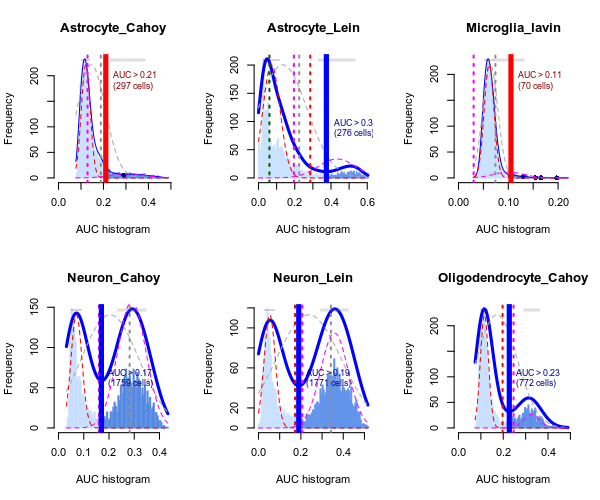

In [39]:
sctk.tl.AUCell_r(adata, gene_set, n_jobs=5, show=True)

In [47]:
adata

AnnData object with n_obs × n_vars = 3005 × 19972
    uns: 'AUCell_threshold', 'AUCell_assignment'
    obsm: 'AUCell'
    layers: 'counts'

In [41]:
adata.uns['AUCell_assignment']['Astrocyte_Cahoy'][:10]

['1772071015_A01',
 '1772066080_D10',
 '1772066090_H07',
 '1772066107_E06',
 '1772066090_F07',
 '1772066099_C03',
 '1772071036_B05',
 '1772066103_D12',
 '1772066102_H03',
 '1772071036_G12']

In [49]:
adata.uns['AUCell_threshold']

,threshold,nCells,geneCate
Global_k1,0.188331,422.0,Astrocyte_Cahoy
L_k2,0.210341,297.0,Astrocyte_Cahoy
R_k3,0.129217,1361.0,Astrocyte_Cahoy
tenPercentOfMax,0.060361,1802.0,Astrocyte_Lein
Global_k1,0.224555,480.0,Astrocyte_Lein
L_k2,0.285537,367.0,Astrocyte_Lein
R_k3,0.195474,598.0,Astrocyte_Lein
minimumDens,0.374450,276.0,Astrocyte_Lein
Global_k1,0.074152,461.0,Microglia_lavin
L_k2,0.105432,70.0,Microglia_lavin


In [42]:
adata.obsm['AUCell']

,Astrocyte_Cahoy,Astrocyte_Lein,Microglia_lavin,Neuron_Cahoy,Neuron_Lein,Oligodendrocyte_Cahoy
1772071015_C02,0.140939,0.088580,0.069052,0.322736,0.381139,0.126754
1772071017_G12,0.124802,0.066015,0.059721,0.301067,0.370780,0.109450
1772071017_A05,0.134295,0.080339,0.069392,0.331905,0.424505,0.116531
1772071014_B06,0.135348,0.078601,0.069999,0.325570,0.422905,0.102190
1772067065_H06,0.132780,0.045638,0.065200,0.336007,0.405231,0.121715
...,...,...,...,...,...,...
1772067059_B04,0.198860,0.170627,0.050893,0.130373,0.078678,0.119254
1772066097_D04,0.208409,0.243655,0.076009,0.103524,0.059663,0.143434
1772063068_D01,0.144973,0.105391,0.056159,0.191524,0.199294,0.125715
1772066098_A12,0.288242,0.406011,0.064286,0.077502,0.046119,0.107823
